In [46]:
%matplotlib inline
#%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"



# Read the City and Ride Data

city_data_one = pd.read_csv("data/city_data.csv")
ride_data_two = pd.read_csv("data/ride_data.csv")


# Merge our two data frames together
combined_city_ride_df = pd.merge(ride_data_two, city_data_one, how='left', on=["city","city"])

# Combine the data into a single dataset

# Display the data table for preview
combined_city_ride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [47]:
city_data_one.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

In [48]:
combined_city_ride_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [49]:
urban_cities=combined_city_ride_df[combined_city_ride_df["type"] == "Urban"]
suburban_cities=combined_city_ride_df[combined_city_ride_df["type"] == "Suburban"]
rural_cities=combined_city_ride_df[combined_city_ride_df["type"] == "Rural"]

urban_ride_cnt=urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare=urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_cnt=urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_cnt=suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare=suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_cnt=suburban_cities.groupby(["city"]).mean()["driver_count"]


rural_ride_cnt=rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare=rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_cnt=rural_cities.groupby(["city"]).mean()["driver_count"]

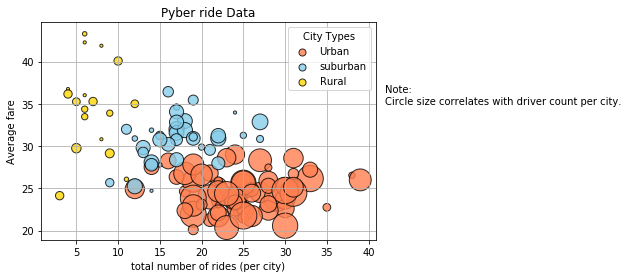

In [59]:
# build the scatter plot for each city type

plt.scatter(urban_ride_cnt,urban_avg_fare,s=10*urban_driver_cnt,c="coral",
           edgecolor="black",linewidth=1, marker="o",
           alpha=.8, label ="Urban")

plt.scatter(suburban_ride_cnt,suburban_avg_fare,s=10*suburban_driver_cnt,c="skyblue",
           edgecolor="black",linewidth=1, marker="o",
           alpha=.8, label ="suburban")

plt.scatter(rural_ride_cnt,rural_avg_fare,s=10*rural_driver_cnt,c="gold",
           edgecolor="black",linewidth=1, marker="o",
           alpha=.8, label ="Rural")
#incorporate other graph properties

plt.title("Pyber ride Data")
plt.xlabel("total number of rides (per city)")
plt.ylabel("Average fare")
plt.grid(True)


#Create a lagend
lgnd = plt.legend(fontsize='medium', mode='Expanded',
                 numpoints=1, scatterpoints=1,
                 loc='best', title='City Types',
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]


# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note:\nCircle size correlates with driver count per city.')

# show plot
plt.show()



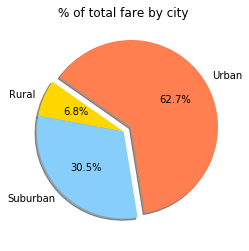

In [55]:
#Total fare by city type 

type_percent_df= 100 * combined_city_ride_df.groupby(['type']).sum()["fare"]/combined_city_ride_df["fare"].sum()
#build a pie chart
plt.pie(type_percent_df,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","coral"],
       explode=[0, 0, 0.1],
       autopct="%1.1f%%", shadow=True, startangle=-215)
plt.title("% of total fare by city")
plt.savefig("analysis/fig2.png")
plt.show()


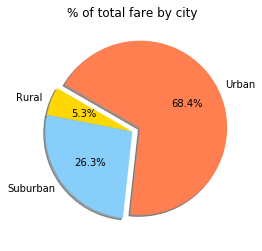

In [53]:
# total ride by city type 

ride_percent= 100 * combined_city_ride_df.groupby(["type"]).count()["ride_id"] / combined_city_ride_df["ride_id"].count()
# build a pie chart
plt.pie(ride_percent,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","coral"],
       explode=[0, 0, 0.1],
       autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of total fare by city")
plt.savefig("analysis/fig2.png")
plt.show()


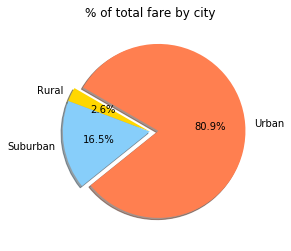

In [58]:
# Total drivers by city 

driver_percent = 100 * city_data_one.groupby(["type"]).sum()["driver_count"] / city_data_one["driver_count"].sum()
# build a pie chart
plt.pie(driver_percent,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","coral"],
       explode=[0, 0, 0.1],
       autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of total fare by city")
plt.savefig("analysis/fig2.png")
plt.show()